# 第三回：布局格式定方圆

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 一、子图

### 1. 使用 `plt.subplots` 绘制均匀状态下的子图

返回元素分别是画布和子图构成的列表
- 第一个数字为行，第二个为列

- `figsize` 参数可以指定整个画布的大小

- `sharex` 和 `sharey` 分别表示是否共享横轴和纵轴刻度

- `tight_layout` 函数可以调整子图的相对大小使字符不会重叠

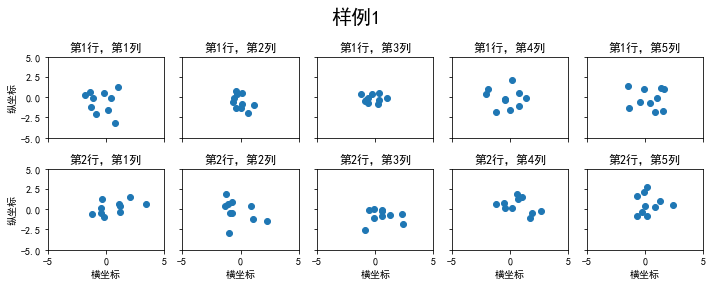

In [3]:
fig, axs = plt.subplots(2, 5, figsize = (10 ,4), sharex = True, sharey = True)
fig.suptitle('样例1', size = 20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1, j+1))
        axs[i][j].set_xlim(-5, 5)
        axs[i][j].set_ylim(-5, 5)
        if i == 1: axs[i][j].set_xlabel('横坐标')
        if j == 0: axs[i][j].set_ylabel('纵坐标')
plt.tight_layout()

除了常规的直角坐标系，也可以通过`projection`方法创建极坐标系下的图表

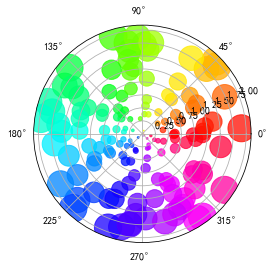

In [4]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r ** 2
colors = theta

plt.subplot(projection = 'polar')
plt.scatter(theta, r, c = colors, s = area, cmap = 'hsv', alpha = 0.75)

### 2. 使用 `GridSpec` 绘制非均匀子图

所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态

利用 `add_gridspec` 可以指定相对宽度比例 `width_ratios` 和相对高度比例参数 `height_ratios`

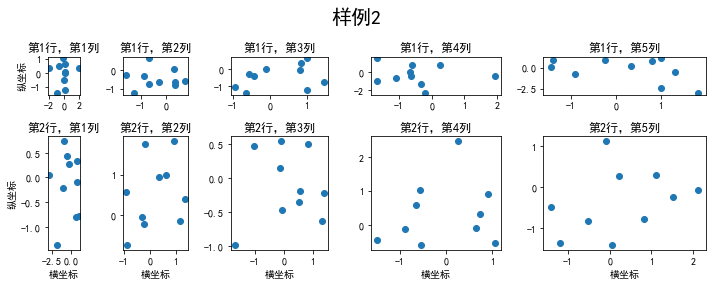

In [5]:
fig = plt.figure(figsize = (10, 4))
spec = fig.add_gridspec(nrows = 2, ncols = 5, width_ratios = [1, 2, 3, 4, 5], height_ratios = [1, 3])
fig.suptitle('样例2', size = 20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j]) # 取出子图
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i + 1, j + 1))
        if i == 1: ax.set_xlabel('横坐标')
        if j == 0: ax.set_ylabel('纵坐标')
fig.tight_layout()

在上面的例子中出现了 `spec[i, j]` 的用法，事实上通过切片就可以实现子图的合并而达到跨图的共能

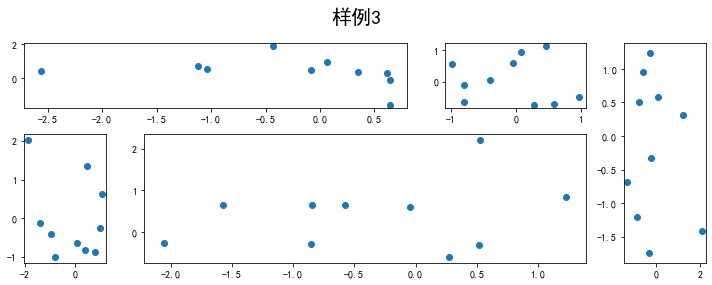

In [13]:
fig = plt.figure(figsize = (10, 4))
spec = fig.add_gridspec(nrows = 2, ncols = 6, width_ratios = [2, 2.5, 3, 1, 1.5, 2], height_ratios = [1, 2])
fig.suptitle('样例3', size = 20)
# sub1
ax = fig.add_subplot(spec[0, :3]) # 占一个行位置，三个列位置
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3: 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0]) # 整个画布的大小是（10，4）
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
plt.tight_layout()

## 二、子图上的方法

在 `ax` 对象上定义了和 `plt` 类似的图形绘制函数，常用的有： `plot, hist, scatter, bar, barh, pie`

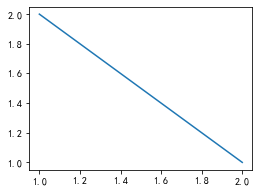

In [15]:
fig, ax = plt.subplots(figsize = (4, 3))
ax.plot([1, 2], [2, 1])

(array([14., 10., 10., 10.,  6., 11., 10., 11.,  9.,  9.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

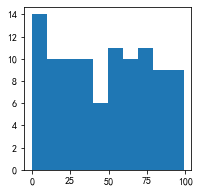

In [21]:
fig, ax = plt.subplots(figsize = (3, 3))
ax.hist(np.random.randint(0, 100, 100))

常用直线的画法为： `axhline, axvline, axline` （水平、垂直、任意方向）

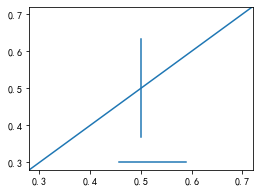

In [26]:
fig, ax = plt.subplots(figsize = (4, 3))
ax.axhline(0.3, 0.4, 0.7)
ax.axvline(0.5, 0.2, 0.8)
ax.axline([0.3, 0.3], [0.7, 0.7])

使用 `grid` 可以加灰色网格

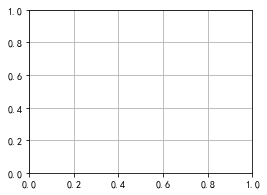

In [27]:
fig, ax = plt.subplots(figsize = (4, 3))
ax.grid(True)

使用 `set_xscale, set_title, set_xlabel` 分别可以设置坐标轴的规度（指对数坐标等）、标题、轴名

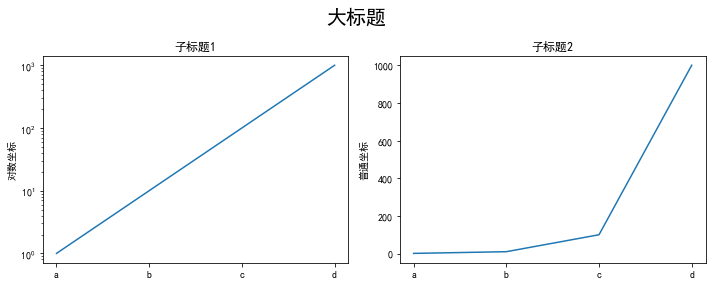

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('大标题', size = 20)
for j in range(2):
    axs[j].plot(list('abcd'), [10 ** i for i in range(4)])
    if j == 0:
        axs[j].set_yscale('log')
        axs[j].set_title('子标题1')
        axs[j].set_ylabel('对数坐标')
    else:
        axs[j].set_title('子标题2')
        axs[j].set_ylabel('普通坐标')
fig.tight_layout()

与一般的 `plt` 方法类似， `legend, annotate, arrow, text` 对象也可以进行相应的绘制

Text(0.8, 0.2, '这是中点')

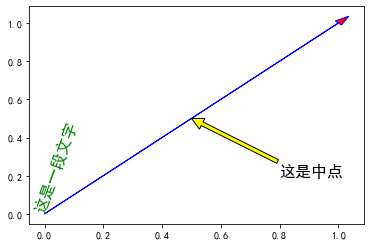

In [31]:
fig, ax = plt.subplots()
ax.arrow(0, 0, 1, 1, head_width = 0.03, head_length = 0.05, facecolor = 'red', edgecolor = 'blue')
ax.text(x = 0, y = 0, s = '这是一段文字', fontsize = 16, rotation = 70, rotation_mode = 'anchor', color = 'green')
ax.annotate('这是中点', xy = (0.5, 0.5), xytext = (0.8, 0.2), 
            arrowprops = dict(facecolor = 'yellow', edgecolor = 'black'), fontsize = 16)

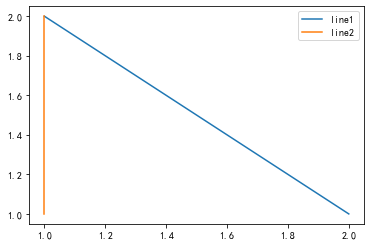

In [37]:
fig, ax = plt.subplots()
ax.plot([1, 2], [2, 1], label = 'line1')
ax.plot([1, 1], [1, 2], label = 'line2')
ax.legend(loc = 0)

其中，图例的 `loc` 参数如下：

|  string   | code  |
|  ----  | ----  |
| best  | 0 |
| upper right  | 1 |
| upper left  | 2 |
| lower left  | 3 |
| lower right  | 4 |
| right  | 5 |
| center left  | 6 |
| center right  | 7 |
| lower center  | 8 |
| upper center  | 9 |
| center  | 10 |